#Final Project Data Analysis with Python

##Bussines Question
---

1. How bike-sharing trends in based on month ?
2. What's the pattern of bike-sharing based on season and month to effectively provide the bikes ?
3. Does weather affect bike-sharing usage ?
4. Do weekdays or holidays affect bike-sharing usage ?
5. What's the trends of bike-shaing based on hour ?

##1. Import library
---

import library what we need to manipulate, analysis, and visualize data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

##2. Data Wrangling
---

2.1. Gathering Data

Load bike-sharing dataset.zip and extract data. In this case, we use data from github.

In [2]:
!wget https://raw.githubusercontent.com/dinata16/Bike-Sharing-Dicoding/main/datasets/Bike-sharing-datasets.zip

--2024-04-17 13:30:44--  https://raw.githubusercontent.com/dinata16/Bike-Sharing-Dicoding/main/datasets/Bike-sharing-datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275505 (269K) [application/zip]
Saving to: ‘Bike-sharing-datasets.zip’

Bike-sharing-datase 100%[===================>] 269.05K  --.-KB/s    in 0.02s   

2024-04-17 13:30:44 (13.6 MB/s) - ‘Bike-sharing-datasets.zip’ saved [275505/275505]



In [3]:
!unzip /content/Bike-sharing-datasets.zip

Archive:  /content/Bike-sharing-datasets.zip
  inflating: day.csv                 
  inflating: hour.csv                
  inflating: Readme.txt              


In [4]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2.2. Data Assesing

Check rows and columns of the data, if the data have duplicate, missing value, and wrong type data, we can fix that in this process

In [6]:
#Check total rows
total_rows,total_columns = df_day.shape
total_rows1,total_columns1 = df_hour.shape

print('Total rows Day: {}'.format(total_rows))
print('Total columns Day: {}'.format(total_columns))
print('Total rows hour: {}'.format(total_rows1))
print('Total columns hour: {}'.format(total_columns1))

Total rows Day: 731
Total columns Day: 16
Total rows hour: 17379
Total columns hour: 17


In [7]:
#Check type data
tp_data= df_day.dtypes
print('Type Data of day: \n{}'.format(tp_data))
print('\n')
tp_data1= df_hour.dtypes
print('Type data of hour: \n{}'.format(tp_data1))

Type Data of day: 
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Type data of hour: 
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Data of column dteday still object type, we have to change to datetime type later

In [8]:
#Check Missing Value
ms_values = df_day.isnull().sum()
print('Missing value of day.csv: \n{}'.format(ms_values))
print('\n')

ms_values1 = df_hour.isnull().sum()
print('Missing value of hour.csv: \n{}'.format(ms_values1))

Missing value of day.csv: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Missing value of hour.csv: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
#Check Duplicate
print('Total duplicate data of Day.csv: {}'.format(df_day.duplicated().sum()))
print('\n')

print('Total duplicate data of hour.csv: {}'.format(df_hour.duplicated().sum()))

Total duplicate data of Day.csv: 0


Total duplicate data of hour.csv: 0


In [10]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [11]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [12]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [14]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##3. Exploratory Data Analysis
---

3.1. Day

In [16]:
df_day.groupby("season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant   cnt                   
       nunique   max   min         mean
season                                 
1          181  7836   431  2604.132597
2          184  8362   795  4992.331522
3          188  8714  1115  5644.303191
4          178  8555    22  4728.162921

In [17]:
df_day.groupby("mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant   cnt                   
     nunique   max   min         mean
mnth                                 
1         62  4521   431  2176.338710
2         57  5062  1005  2655.298246
3         62  8362   605  3692.258065
4         60  7460   795  4484.900000
5         62  8294  2633  5349.774194
6         60  8120  3767  5772.366667
7         62  8173  3285  5563.677419
8         62  7865  1115  5664.419355
9         60  8714  1842  5766.516667
10        62  8156    22  5199.225806
11        60  6852  1495  4247.183333
12        62  6606   441  3403.806452

In [18]:
df_day.groupby("weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant   cnt                   
        nunique   max   min         mean
weekday                                 
0           105  8227   605  4228.828571
1           105  7525    22  4338.123810
2           104  7767   683  4510.663462
3           104  8173   441  4548.538462
4           104  7804   431  4667.259615
5           104  8362  1167  4690.288462
6           105  8714   627  4550.542857

3.2. Hour

In [19]:
df_hour.groupby("hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant  cnt                
   nunique  max min        mean
hr                             
0      726  283   2   53.898072
1      724  168   1   33.375691
2      715  132   1   22.869930
3      697   79   1   11.727403
4      697   28   1    6.352941
5      717   66   1   19.889819
6      725  213   1   76.044138
7      727  596   1  212.064649
8      727  839   5  359.011004
9      727  426  14  219.309491
10     727  539   8  173.668501
11     727  663  10  208.143054
12     728  776   3  253.315934
13     729  760  11  253.661180
14     729  750  12  240.949246
15     729  750   7  251.233196
16     730  783  11  311.983562
17     730  976  15  461.452055
18     728  977  23  425.510989
19     728  743  11  311.523352
20     728  567  11  226.030220
21     728  584   6  172.314560
22     728  502   9  131.335165
23     728  256   2   87.831044

Change type data of column dteday to datetime

In [20]:
# Ubah menjadi format datetimr
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Gabungkan data
df_maindt = pd.merge(
    left=df_day,
    right=df_hour,
    how="inner",
    on="dteday",
    suffixes=('_daily','_hourly')
)

df_maindt.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##4. Data Visualization

##Question 1: How bike-sharing trends based on month ?

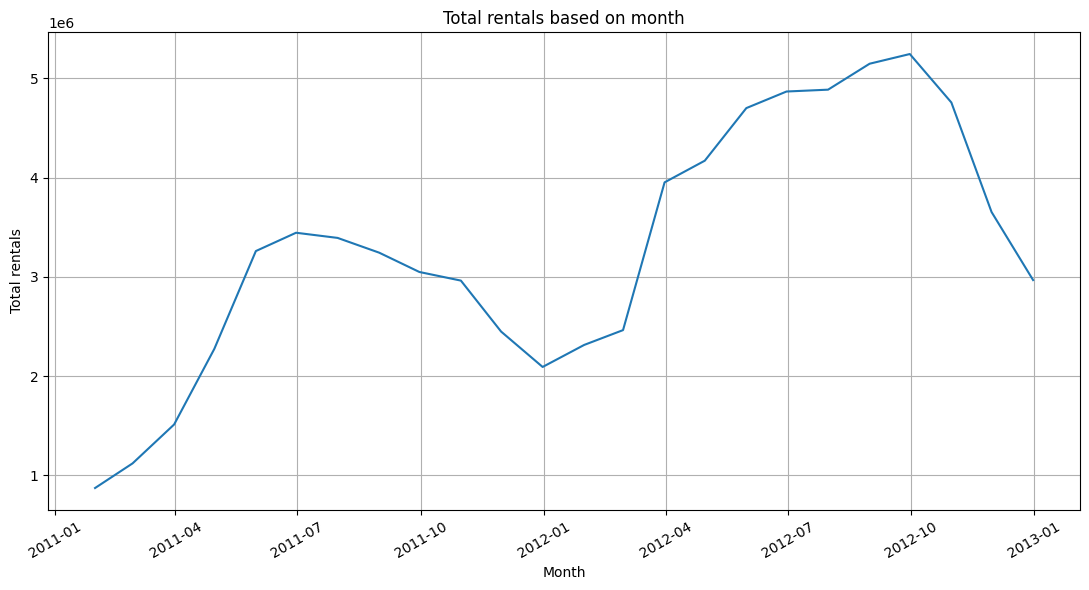

In [21]:
# Merge day and hour data
df_monthly = df_maindt.resample('M', on='dteday').sum()

# Plot the data
plt.figure(figsize=(11,6))
plt.plot(df_monthly.index, df_monthly['cnt_daily'])

plt.xlabel('Month')
plt.ylabel('Total rentals')
plt.title('Total rentals based on month')

plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()


It can be concluded that bike rentals fluctuate every month

##Question 2:  What's the pattern of bike-sharing based on season and month to effectively provide the bikes ?

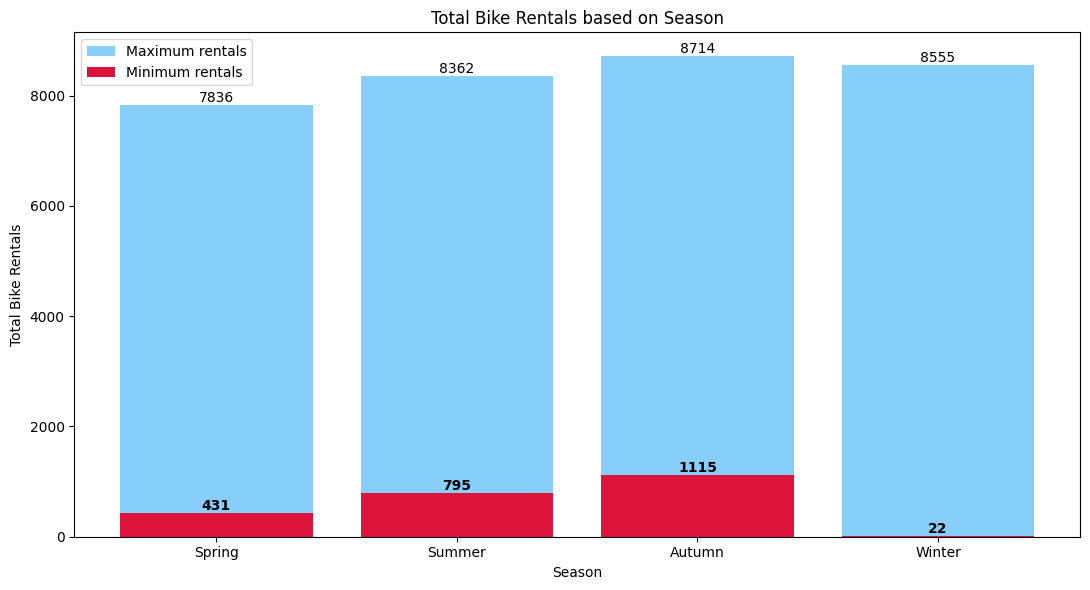

In [23]:
# Based on season
df_season = df_maindt.groupby("season_daily").agg({
    "instant_daily": "nunique",
    "cnt_daily": ["max", "min"]
})

# Plot data
plt.figure(figsize=(11, 6))
x = df_season.index
rent_max = df_season[('cnt_daily', 'max')]
rent_min = df_season[('cnt_daily', 'min')]

plt.bar(x, rent_max, label='Maximum rentals', color='lightskyblue')
plt.bar(x, rent_min, label='Minimum rentals', color='crimson')

season_labels = ['Spring', 'Summer', 'Autumn', 'Winter']
plt.xticks(x, season_labels)

plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals based on Season')
plt.legend()

for i, (max, min) in enumerate(zip(rent_max, rent_min)):
    plt.text(i+1, max, str(max), ha='center', va='bottom')
    plt.text(i+1, min, str(min), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

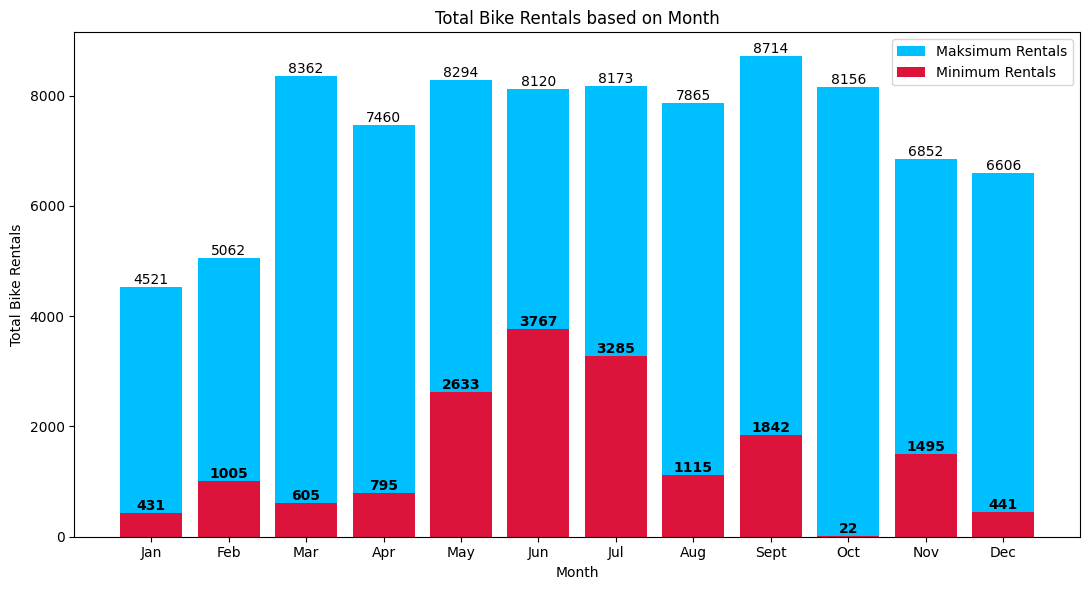

In [24]:
#Min max total rentals basod on month
df_monthly = df_maindt.groupby("mnth_daily").agg({
    "instant_daily": "nunique",
    "cnt_daily": ["max", "min"]
})

# Plot the data
plt.figure(figsize=(11, 6))
x = df_monthly.index
rent_max = df_monthly[('cnt_daily', 'max')]
rent_min = df_monthly[('cnt_daily', 'min')]

plt.bar(x, rent_max, label='Maksimum Rentals', color='deepskyblue')
plt.bar(x, rent_min, label='Minimum Rentals', color='crimson')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(x,month_labels)

plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals based on Month')
plt.legend()

for i, (max, min) in enumerate(zip(rent_max, rent_min)):
    plt.text(i+1, max, str(max), ha='center', va='bottom')
    plt.text(i+1, min, str(min), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

It can be concluded that maximum rentals occurs on Autumn Season and September

##Question 3: Do weekdays affect bike-sharing usage ?

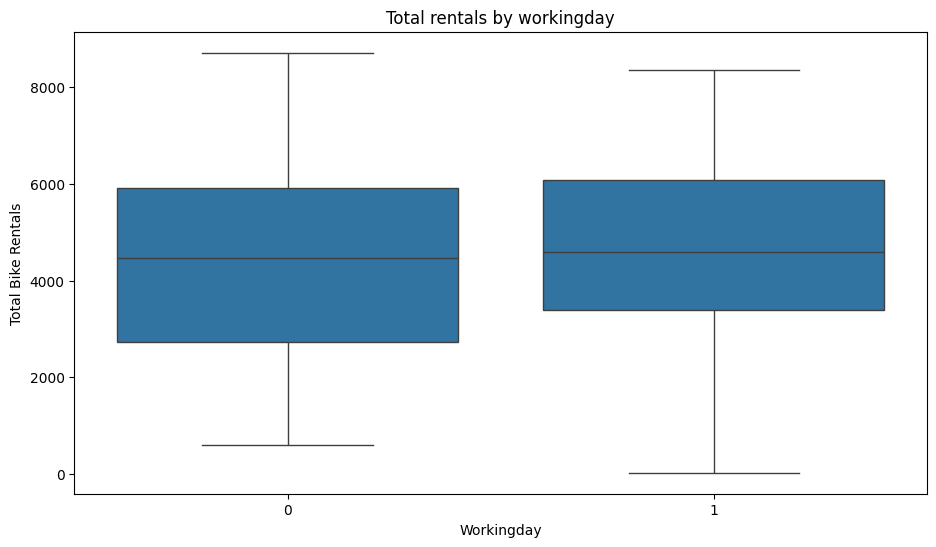

In [25]:
#Plot data based on workingday (1) and not workingday (0)

plt.figure(figsize=(11, 6))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=df_maindt)
plt.title("Total rentals by workingday")
plt.xlabel("Workingday")
plt.ylabel("Total Bike Rentals")
plt.show()

Maximum total rentals occurs on workingday

##Question 4: Does weather affect bike-sharing usage ?

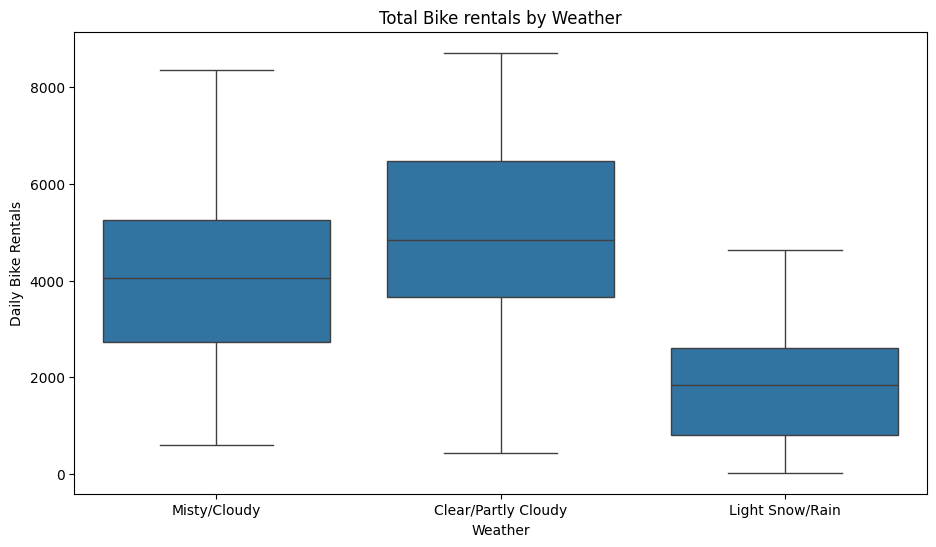

In [26]:
#PLot data by weather
df_maindt['weathersit_daily'] = df_maindt['weathersit_daily'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
plt.figure(figsize=(11, 6))
sns.boxplot(x="weathersit_daily", y="cnt_daily", data=df_maindt)
plt.title("Total Bike rentals by Weather")
plt.xlabel("Weather")
plt.ylabel("Daily Bike Rentals")
plt.show()

There are differences in bike rentals in each weather. In clear/partly cloudly, biike rentals has the highest value while the lowest value is in light snow/rain.

##Question 5: What's the trends of bike-shaing based on hour ?

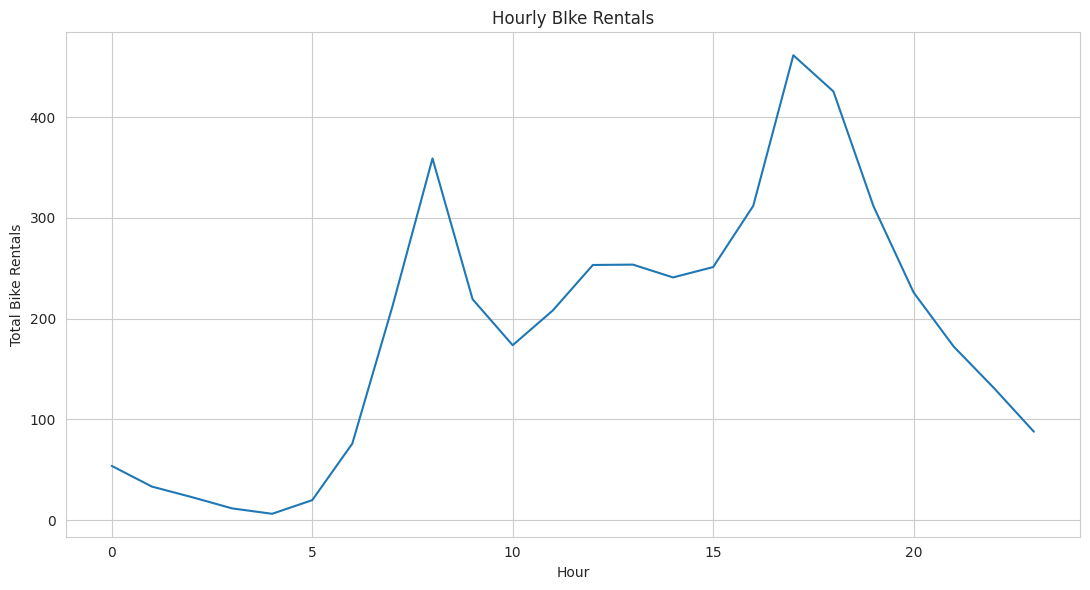

In [27]:
#Hourly Bike Rentals
sns.set_style("whitegrid")
plt.figure(figsize=(11, 6))
sns.lineplot(x="hr", y="cnt_hourly", data=df_maindt, errorbar=None)

plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.title('Hourly BIke Rentals')

plt.tight_layout()
plt.show()

Total bike rentals increases from 7am then decreases around 9am. It increases again on 3pm and decreases around 7pm

##Conclusion

#1. How bike-sharing trends in based on month ?


Based on Data visualization, it can be concluded that the trend of total bike rentals over the years is fluctuate and there are the highest bike rentals in October 2012

#2. What's the pattern of bike-sharing based on season and month to effectively provide the bikes ?

The highest bike rentals occurs in September with maximum rentals of 8714 and minimum rentals of 1842. Meanwhile the highest bike rentals by season occurs in autumn season with maximum rentals of 8714 and minmum rentals of 1115. Therefore in September and autumns season provide more bike for rentals

#3. Does weather affect bike-sharing usage ?

Yes, it does. The highest rentals occurs in Clear/Partly Cloudy

#4. Do weekdays or holidays affect bike-sharing usage ?

Yes, it do. Based on data visualization, the highest rentals occurs on workingdays. It can be concluded that workingdays affect bike-sharing usage.

#5. What's the trends of bike-shaing based on hour ?

Based on Data visualization, Total bike rentals increases from 7am then decreases around 9am. It increases again on 3pm and decreases around 7pm. If considered by hour, it is the time when we go home from work